In [1]:
import numpy as np
import cv2
from matplotlib.pyplot import plot
from pathlib import Path
import utils

In [2]:
Q1_ROOT_PATH = Path('data/q1')
BUNNY_IMG = Q1_ROOT_PATH / 'bunny.jpeg'
ANNOTATIONS_2D_3D = Q1_ROOT_PATH / "bunny.txt"

In [3]:
image = utils.load_image(BUNNY_IMG)

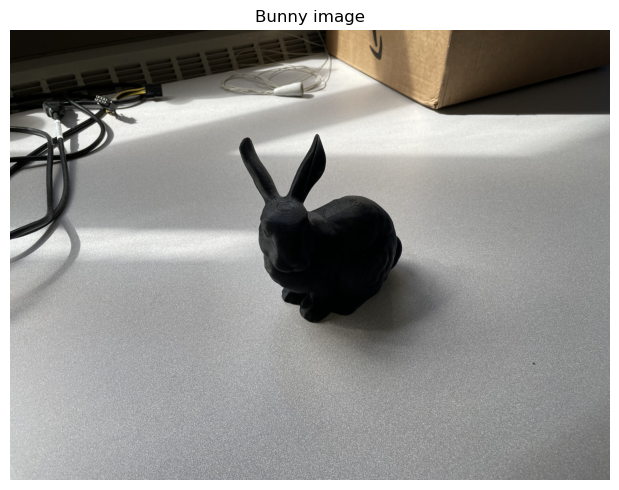

In [4]:
utils.show_images([image], ['Bunny image'])

In [5]:
annotaions = []
with open(ANNOTATIONS_2D_3D, 'r') as annotations_txt:
    for line in annotations_txt:
        annotaions.append(line.split())

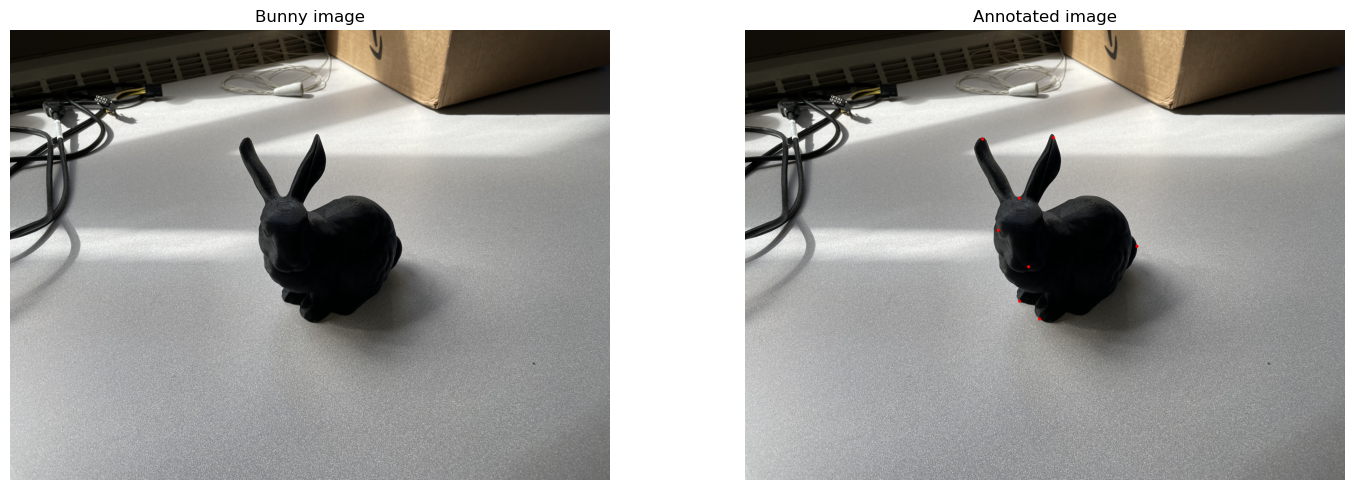

In [6]:
annotated_image = image.copy()
radius = 5
color = (0, 0, 255)
thickness = 10

for annotation in annotaions:
    point = (int(annotation[0]), int(annotation[1]))
    cv2.circle(annotated_image, point, radius, color, thickness)

utils.show_images([image, annotated_image], ['Bunny image', 'Annotated image'])

del annotated_image

In [7]:
# Constract the A matrix Ap = 0
A = []

for annotation in annotaions:
    xi = float(annotation[0])
    yi = float(annotation[1])
    xw = float(annotation[2])
    yw = float(annotation[3])
    zw = float(annotation[4])
    
    equ1 = [0, 0, 0, 0, -xw, -yw, -zw, -1, yi * xw, yi * yw, yi * zw, yi]
    equ2 = [xw, yw, zw, 1, 0, 0, 0, 0, -xi * xw, -xi * yw, -xi * zw, -xi]
    A.append(equ1)
    A.append(equ2)

A = np.array(A)
_, _, vt = np.linalg.svd(A)
P = vt[-1].reshape((3, 4))
P = P / P[-1][-1]

In [8]:
print(P)

[[ 6.43169368e+03 -2.94843744e+03  1.14658061e+03  2.22724350e+03]
 [-9.34819249e+02 -6.75486473e+03  2.02949013e+03  1.82218778e+03]
 [ 5.79307220e-01 -1.42385366e+00 -7.35268478e-01  1.00000000e+00]]


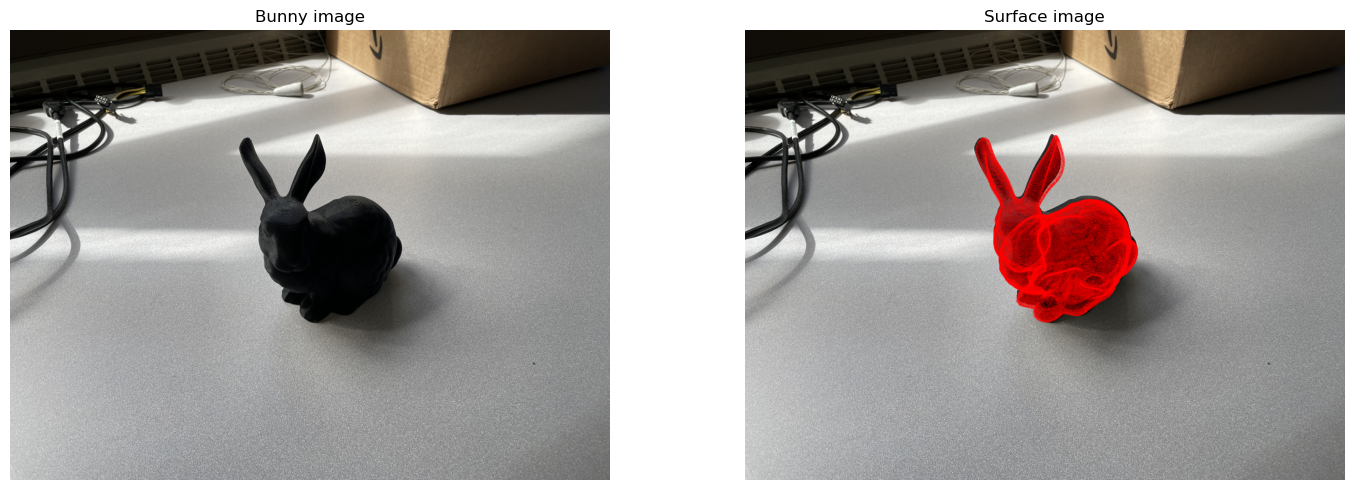

In [9]:
points_to_project = np.load(Q1_ROOT_PATH / 'bunny_pts.npy')

projected_image = image.copy()
radius = 5
color = (0, 0, 255)
thickness = 1

for point in points_to_project:
    point = [point[0], point[1], point[2], 1]
    point_2D = P @ point
    point_2D = point_2D / point_2D[-1]
    
    point_2D = [int(point_2D[0]), int(point_2D[1])]
    cv2.circle(projected_image, point_2D, radius, color, thickness)

utils.show_images([image, projected_image], ['Bunny image', 'Surface image'])

del points_to_project

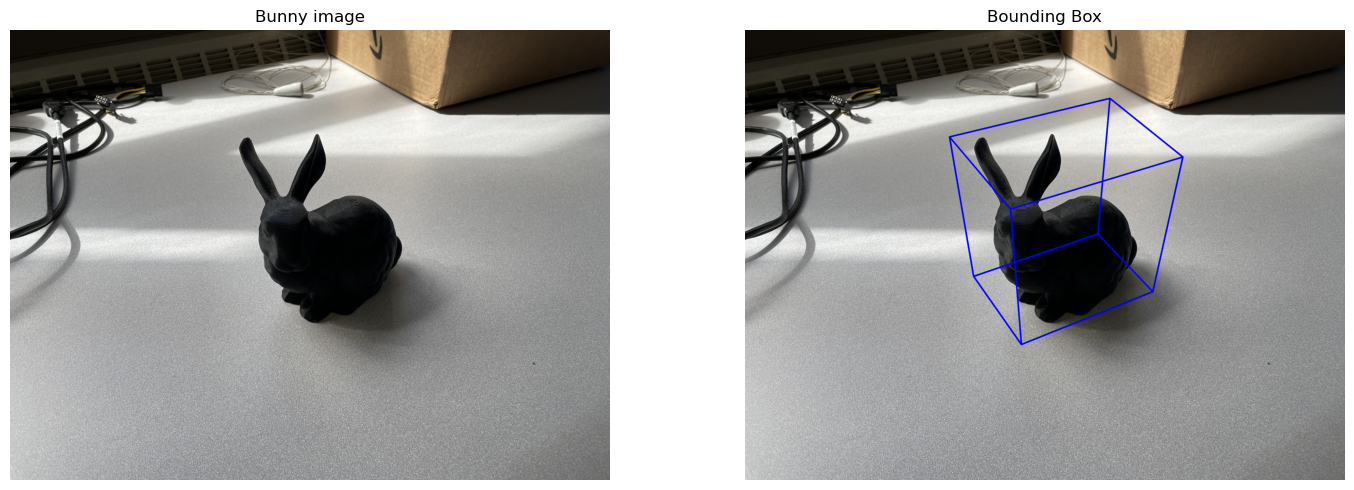

In [10]:
points_to_project = np.load(Q1_ROOT_PATH / 'bunny_bd.npy')

bbox_image = image.copy()
color = (255, 0, 0)
thickness = 10

for point in points_to_project:
    point1 = [point[0], point[1], point[2], 1]
    point2 = [point[3], point[4], point[5], 1]
    
    point1_2D = P @ point1
    point1_2D = point1_2D / point1_2D[-1]
    
    point2_2D = P @ point2
    point2_2D = point2_2D / point2_2D[-1]
    
    point1_2D = [int(point1_2D[0]), int(point1_2D[1])]
    point2_2D = [int(point2_2D[0]), int(point2_2D[1])]

    cv2.line(bbox_image, point1_2D, point2_2D, color, thickness)
    
utils.show_images([image, bbox_image], ['Bunny image', 'Bounding Box'])

del points_to_project

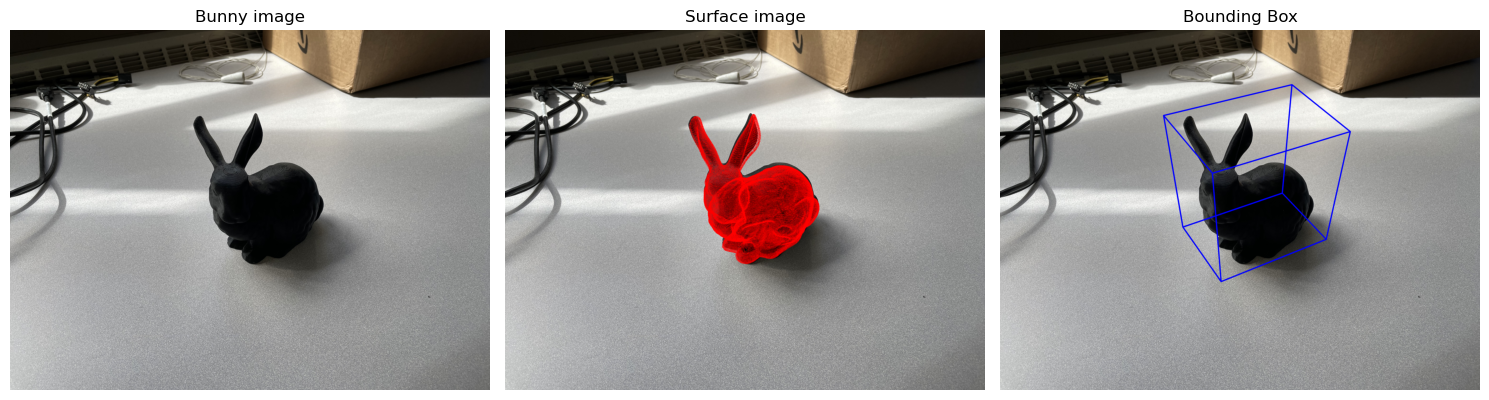

In [11]:
utils.show_images([image, projected_image, bbox_image], ['Bunny image', 'Surface image', 'Bounding Box'])